# Лабораторная работа №2

# 1. Логистическач регрессия

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [134]:
def compute_cost(X, y, theta):
    m = len(y)

    h = sigmoid(X @ theta)
    #print(h)
    #h = sigmoid(X.dot(theta))
    #print(h)
    epsilon = 1e-5
    #cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    cost = (-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon)).mean()
    #print((-np.log(h)))
    return cost

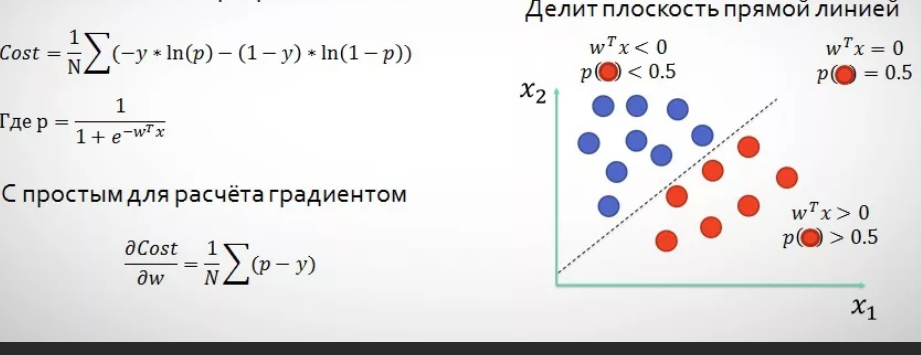

In [135]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        #print(params)
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

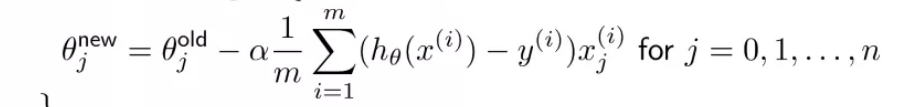

In [136]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

In [137]:
X

array([[ 1.  ,  7.7 ,  0.62, ...,  3.34,  0.53,  9.5 ],
       [ 1.  ,  7.7 ,  0.66, ...,  3.4 ,  0.47,  9.4 ],
       [ 1.  ,  9.1 ,  0.34, ...,  3.18,  0.55, 11.4 ],
       ...,
       [ 1.  ,  6.8 ,  0.81, ...,  3.51,  0.66, 10.8 ],
       [ 1.  ,  8.6 ,  0.49, ...,  2.93,  1.95,  9.9 ],
       [ 1.  , 11.6 ,  0.23, ...,  3.14,  0.7 ,  9.9 ]])

In [139]:
#from KNearestNeighbors import KNearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import random

df = pd.read_csv("../winequality-red.csv")
df["label"] = df.quality
df = df.drop("quality", axis=1)

column_names = []
for column in df.columns:
    name = column.replace(" ", "_")
    column_names.append(name)
df.columns = column_names

def transform_label(value):
    if value <= 5:
        return 0
    else:
        return 1

df["label"] = df.label.apply(transform_label)
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)

X_train = train_df.iloc[:, :-1].to_numpy()
y_train = train_df.iloc[:, -1:].to_numpy()

X_test = test_df.iloc[:, :-1].to_numpy()
y_test = test_df.iloc[:, -1:].to_numpy()
y = y_train

X = X_train


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


W: [[-352.05643662]
 [  -8.61974997]
 [-594.32922352]
 [-200.68083593]
 [ -13.9040148 ]
 [-288.29535592]
 [  12.88348676]
 [  -4.27712096]
 [-347.67123926]
 [-467.35333029]
 [ 603.84934893]
 [ 248.96270647]]


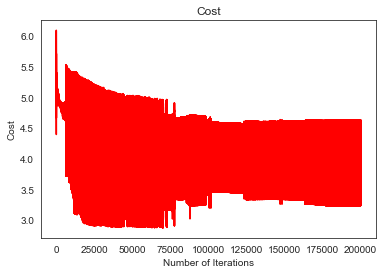

In [140]:
m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
params = np.zeros((n,1))

iterations = 200000
learning_rate = 1

initial_cost = compute_cost(X, y, params)

(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("W:", params_optimal)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title('Cost')
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [18]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y)) / (len(y))

print(score)

0.6497263487099296


данный результат и график Cost сведетельствуют о 1) можно утверждать о переобучении (большие по модулю компоненты вектора весов) ; 2) разделяющая гиперплоскость имеет точность чуть выше случайной.

In [15]:
from sklearn.linear_model import LogisticRegression
X_train = train_df.iloc[:, :-1].to_numpy()
y_train = train_df.iloc[:, -1].to_numpy()
clf = LogisticRegression(penalty = 'none').fit(X_train, y_train)
pred2 = clf.predict(X_train)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
 (sum(pred2 == y_train)) / (len(y_train))

0.7544956997654417

In [19]:
clf.__dict__

{'penalty': 'none',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'n_features_in_': 11,
 'classes_': array([0, 1], dtype=int64),
 'coef_': array([[ 0.07946021, -4.2976095 , -1.94601962,  0.03586267, -1.89869961,
          0.02996512, -0.01850665, -1.72907105, -1.55344703,  2.54610715,
          0.93542518]]),
 'intercept_': array([-1.74528606]),
 'n_iter_': array([100])}

In [21]:
params_optimal

array([[-261.17760314],
       [-261.17760314],
       [-261.17760314],
       [  11.91465688],
       [-761.75714824],
       [-325.71899345],
       [ -15.44897515],
       [-225.26181893],
       [  19.64251068],
       [  -3.07716115],
       [-258.80414497],
       [-416.65925278],
       [ 704.13727665],
       [ 250.24277469]])

In [20]:
clf.coef_

array([[ 0.07946021, -4.2976095 , -1.94601962,  0.03586267, -1.89869961,
         0.02996512, -0.01850665, -1.72907105, -1.55344703,  2.54610715,
         0.93542518]])

Видно, что классификатор из sklearn срабатывает несколько лучше. Непосредсвтенная причина - другой порядок величин компонент вектора весов, значит, высока вероятность, что дело в регуляризации, за счет чего качество модели улучшается, а разделяющая гиперплоскость более точно разделяет классы. 

# №2 K соседей

In [105]:
df = pd.read_csv("winequality-red.csv")
df["label"] = df.quality
df = df.drop("quality", axis=1)

column_names = []
for column in df.columns:
    name = column.replace(" ", "_")
    column_names.append(name)
df.columns = column_names

def transform_label(value):
    if value <= 5:
        return 0
    else:
        return 1

df["label"] = df.label.apply(transform_label)
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)

In [106]:
X_train = train_df.iloc[:, :-1].to_numpy()
y_train = train_df.iloc[:, -1].to_numpy()

X_test = test_df.iloc[:, :-1].to_numpy()
y_test = test_df.iloc[:, -1].to_numpy()

In [107]:
import numpy as np


class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors

        self.n_classes = 3

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

        point_dist = [self.euclidian_distance(x_test, self.X_train) for x_test in X_test]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        neighbors = self.kneighbors(X_test)
        y_pred = np.array([np.argmax(np.bincount(self.y_train[neighbor])) for neighbor in neighbors])
        return y_pred


    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)

        return float(sum(y_pred == y_test)) / float(len(y_test))


In [108]:
castom = KNearestNeighbors(X_train, y_train, n_neighbors=5)
skl = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

y_pred = our_classifier.score(X_test, y_test)
y = sklearn_classifier.score(X_test, y_test)


print('not sklearn:', y_pred, 'sklearn:', y)

not sklearn: 0.80625 sklearn: 0.80625


Наблюдается совпаление точности при равном количестве параметра количества соседей. Датасет подходящий для классификатора К-средних, тк изначально датасет имел 10 различных меток класса и был приведен к задаче бинарной классификации, поэтому переходы между различиями в классах стали менее "плавные".

# №4-5 DT + RF

In [113]:

def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)
    
    return train_df, test_df


In [115]:


df = pd.read_csv("winequality-red.csv")
df["label"] = df.quality
df = df.drop("quality", axis=1)

column_names = []
for column in df.columns:
    name = column.replace(" ", "_")
    column_names.append(name)
df.columns = column_names

def transform_label(value):
    if value <= 5:
        return 0
    else:
        return 1

df["label"] = df.label.apply(transform_label)
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)

In [80]:
from math import *

class DecisionTree():
    def __init__(self, x, y, n_features, f_idxs, idxs, depth=10, min_leaf=5):
        self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
        self.depth = depth
        
        #print(f_idxs)
#         print(self.depth)
        self.n_features = n_features
        self.n, self.c = len(idxs), x.shape[1]
        self.val = np.mean(y.iloc[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in self.f_idxs: self.find_better_split(i)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth-1, min_leaf=self.min_leaf)
        self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth-1, min_leaf=self.min_leaf)

    def find_better_split(self, var_idx):
        x, y = self.x.values[self.idxs,var_idx], self.y.values[self.idxs]
        sort_idx = np.argsort(x)
        sort_y, sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt, rhs_sum, rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt, lhs_sum, lhs_sum2 = 0, 0., 0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1
            rhs_cnt -= 1
            
            lhs_sum += yi
            rhs_sum -= yi
            
            lhs_sum2 += yi**2
            rhs_sum2 -= yi**2
            
            if i < self.min_leaf or xi == sort_x[i+1]:
                continue

            lhs_std = sqrt((lhs_sum2/lhs_cnt) - (lhs_sum/lhs_cnt)**2)
            rhs_std = sqrt((rhs_sum2/rhs_cnt) - (rhs_sum/rhs_cnt)**2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score < self.score: 
                self.var_idx, self.score, self.split = var_idx, curr_score, xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf') or self.depth <= 0 
    

    def predict(self, x):
        return np.array([self.predict_row(x.iloc[xi]) for xi in range(x.shape[0])])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)
    
    
    
class RandomForest():
    def __init__(self, x, y, n_trees, sample_sz, depth=10, min_leaf=5):
        np.random.seed(12)
        self.n_features = int(np.sqrt(x.shape[1]))
  
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf  = x, y, sample_sz, depth, min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        return DecisionTree(self.x.iloc[idxs], self.y.iloc[idxs], self.n_features, f_idxs,
                    idxs=np.array(range(self.sample_sz)),depth = self.depth, min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)


In [116]:
x = train_df.iloc[:, :-1].reset_index().drop('index', axis = 1)
y = train_df.iloc[:, -1:].reset_index().drop('index', axis = 1)
n_trees = 100

sample_sz = train_df.iloc[:, :-1].shape[0]


a = RandomForest(x, y, n_trees, sample_sz )

In [82]:
pred = a.predict(test_df.iloc[:, :-1].reset_index().drop('index', axis = 1))

In [83]:
pred2 = [0 if predi < 0.5 else 1 for predi in pred]

In [84]:
test = test_df.iloc[:, -1].values
test

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,

In [85]:
(sum(pred2 == test)) / (len(test))

0.825

In [118]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)
classifier.fit(x, y)

C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [119]:
y_pred = classifier.predict(test_df.iloc[:, :-1].reset_index().drop('index', axis = 1))

In [120]:
(sum(y_pred == test)) / (len(test))

0.8375

In [122]:

a1 = DecisionTree(x, y, 1,  np.random.permutation(x.shape[1])[:1], np.array(range(x.shape[0])))

In [123]:
pred3 = a1.predict(test_df.iloc[:, :-1].reset_index().drop('index', axis = 1))
pred_tr = a1.predict(x.reset_index().drop('index', axis = 1))

In [124]:
pred3 = [0 if predi < 0.5 else 1 for predi in pred3]
pred_ttr = [0 if predi < 0.5 else 1 for predi in pred_tr]

In [125]:
(sum(pred3 == test)) / (len(test))

0.71875

In [129]:
(sum(pred_ttr == train_df.iloc[:, -1])) / (len(train_df.iloc[:, -1]))

0.7748240813135262

In [128]:
test

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,

In [93]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0)

In [94]:
clf2.fit(x, y)

DecisionTreeClassifier(random_state=0)

In [95]:
y_pred2 = clf2.predict(test_df.iloc[:, :-1].reset_index().drop('index', axis = 1))

In [96]:
(sum(y_pred2 == test)) / (len(test))

0.771875

По точности по обучающей и тестовой выборке видно, что решающее дерево переобучено. Самым вероятным решением было бы навесить регуляризацию. Деревьям свойственно быстрое переобучение, это ожидаемый эффект.